In [5]:
import pandas as pd
import numpy as np

In [49]:
file_path = "../datasets/Mappa-dei-pub-circoli-locali-in-Italia.json"
df = pd.read_json(file_path, encoding="latin1")
df

ccomune             cprovincia  cregione            cnome  \
0              ALTRO                  ALTRO     ALTRO                    
1              ALTRO                  ALTRO     ALTRO      Lenny's Pub   
2              ALTRO                  ALTRO     ALTRO  Murrayfield Pub   
3              ALTRO                  ALTRO     ALTRO           Snop?e   
4       Ala di Stura                 TORINO  Piemonte                    
...              ...                    ...       ...              ...   
2492   Barletta (BT)  BARLETTA ANDRIA TRANI    Puglia      Santa Croce   
2493  Bisceglie (BT)  BARLETTA ANDRIA TRANI    Puglia      Auld Dublin   
2494  Bisceglie (BT)  BARLETTA ANDRIA TRANI    Puglia            Ferus   
2495      Trani (BT)  BARLETTA ANDRIA TRANI    Puglia          Re Artù   
2496      Trani (BT)  BARLETTA ANDRIA TRANI    Puglia     Well's Fargo   

      canno_inserimento cdata_e_ora_inserimento  \
0                  2011    2011-06-25T23:17:43Z   
1                  2011    2011-07-29T17:22:56Z   
2                  2015    2015-10-24T09:28:06Z   
3                  2010    2010-09-22T08:32:52Z   
4                  2012    2012-05-21T14:28:45Z   
...                 ...                     ...   
2492               2010    2010-01-17T16:15:08Z   
2493               2014    2014-03-03T20:56:16Z   
2494               2014    2014-01-07T19:22:18Z   
2495               2009    2009-09-04T07:57:05Z   
2496               2009    2009-08-10T12:44:03Z   

      cidentificatore_in_openstreetmap  clongitudine  clatitudine  
0                           1339088150     13.733257    45.575830  
1                           1375887295     12.418681    46.747584  
2                           3323888102      9.029585    45.831340  
3                            921157802     13.640939    45.954607  
4                           1760949034      7.307306    45.313150  
...                                ...           ...          ...  
2492                         615632993     16.285782    41.320671  
2493                        2613737619     16.497204    41.241814  
2494                        2613737620     16.506175    41.240957  
2495                         482836935     16.418124    41.281518  
2496                         387223648     16.436765    41.267264  

[2497 rows x 9 columns]

In [51]:
#quanti dati ci sono in totale?
df.shape

(2497, 9)

In [53]:
#quali sono i metadati?
df.dtypes

ccomune                              object
cprovincia                           object
cregione                             object
cnome                                object
canno_inserimento                     int64
cdata_e_ora_inserimento              object
cidentificatore_in_openstreetmap      int64
clongitudine                        float64
clatitudine                         float64
dtype: object

In [55]:
df.columns = [col.lstrip("c") for col in df.columns]
df.dtypes

omune                               object
provincia                           object
regione                             object
nome                                object
anno_inserimento                     int64
data_e_ora_inserimento              object
identificatore_in_openstreetmap      int64
longitudine                        float64
latitudine                         float64
dtype: object

In [57]:
df.rename(columns = {"omune" : "comune"}, inplace=True)
df.dtypes

comune                              object
provincia                           object
regione                             object
nome                                object
anno_inserimento                     int64
data_e_ora_inserimento              object
identificatore_in_openstreetmap      int64
longitudine                        float64
latitudine                         float64
dtype: object

In [59]:
#stampiamo il primo elemento
df.head(1)

comune provincia regione nome  anno_inserimento data_e_ora_inserimento  \
0  ALTRO     ALTRO   ALTRO                   2011   2011-06-25T23:17:43Z   

   identificatore_in_openstreetmap  longitudine  latitudine  
0                       1339088150    13.733257    45.57583

In [61]:
#stampiamo l'ultimo elemento
df.tail(1)

comune              provincia regione          nome  \
2496  Trani (BT)  BARLETTA ANDRIA TRANI  Puglia  Well's Fargo   

      anno_inserimento data_e_ora_inserimento  \
2496              2009   2009-08-10T12:44:03Z   

      identificatore_in_openstreetmap  longitudine  latitudine  
2496                        387223648    16.436765   41.267264

In [67]:
#riusciamo a stampare un elemento a caso?
df.sample()

comune    provincia   regione               nome  anno_inserimento  \
155  Conzano  ALESSANDRIA  Piemonte  Vineria del Pozzo              2015   

    data_e_ora_inserimento  identificatore_in_openstreetmap  longitudine  \
155   2015-01-21T09:52:16Z                       3298293019     8.455335   

     latitudine  
155   45.020411

In [75]:
#quali sono gli anni di inserimento presenti?
df["anno_inserimento"].unique()

array([2011, 2015, 2010, 2012, 2014, 2016, 2013, 2008, 2009, 2007],
      dtype=int64)

In [87]:
#quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46?
attivita_lon_lat = df[((df["longitudine"] >= 9) & (df["longitudine"] <= 10)) & ((df["latitudine"] >= 45) & (df["latitudine"] <= 46))]
attivita_lon_lat.shape[0]

303

In [91]:
#quante attività ci sono nella provincia di Vicenza?
attivita_vicenza = df[df["provincia"] == "VICENZA"]
attivita_vicenza.shape[0]

73

In [98]:
#quante enoteche ci sono, e come si chiamano?
num_enoteche = df.nome.replace("", np.nan)
num_enoteche.count()

2211

In [116]:
#quante attivita ci sono in Lazio e Abruzzo assieme?
attivita_lazio_abruzzo = df[df["regione"].isin(["Lazio", "Abruzzo"])]
attivita_lazio_abruzzo.shape[0]

237

In [120]:
#importiamo il dataset insurance.csv dei beginner_datasets
ins = pd.read_csv("../datasets/beginner datasets 1/insurance.csv")

In [122]:
#Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna;
ins.shape

(1338, 7)

In [124]:
ins.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [126]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [132]:
#Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
ins.groupby("region")["charges"].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [134]:
#E rispetto a smoker? E a sex?
ins.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [136]:
ins.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [142]:
#Quali sono i descrittori statistici di bmi? Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi?
ins.groupby("bmi").describe().transpose()

bmi                15.960       16.815       17.195        17.290      17.385  \
age      count     1.0000     2.000000      1.00000      3.000000     1.00000   
         mean     18.0000    29.500000     26.00000     27.666667    23.00000   
         std          NaN    12.020815          NaN      9.504385         NaN   
         min      18.0000    21.000000     26.00000     18.000000    23.00000   
         25%      18.0000    25.250000     26.00000     23.000000    23.00000   
         50%      18.0000    29.500000     26.00000     28.000000    23.00000   
         75%      18.0000    33.750000     26.00000     32.500000    23.00000   
         max      18.0000    38.000000     26.00000     37.000000    23.00000   
children count     1.0000     2.000000      1.00000      3.000000     1.00000   
         mean      0.0000     1.500000      2.00000      1.333333     1.00000   
         std          NaN     0.707107          NaN      1.154701         NaN   
         min       0.0000     1.000000      2.00000      0.000000     1.00000   
         25%       0.0000     1.250000      2.00000      1.000000     1.00000   
         50%       0.0000     1.500000      2.00000      2.000000     1.00000   
         75%       0.0000     1.750000      2.00000      2.000000     1.00000   
         max       0.0000     2.000000      2.00000      2.000000     1.00000   
charges  count     1.0000     2.000000      1.00000      3.000000     1.00000   
         mean   1694.7964  4904.000350  14455.64405   7813.353433  2775.19215   
         std          NaN  2455.844784          NaN   4619.986089         NaN   
         min    1694.7964  3167.455850  14455.64405   3732.625100  2775.19215   
         25%    1694.7964  4035.728100  14455.64405   5305.302600  2775.19215   
         50%    1694.7964  4904.000350  14455.64405   6877.980100  2775.19215   
         75%    1694.7964  5772.272600  14455.64405   9853.717600  2775.19215   
         max    1694.7964  6640.544850  14455.64405  12829.455100  2775.19215   

bmi               17.400     17.480     17.670      17.765    17.800  ...  \
age      count     1.000     1.0000     1.0000      1.0000     1.000  ...   
         mean     21.000    19.0000    26.0000     32.0000    19.000  ...   
         std         NaN        NaN        NaN         NaN       NaN  ...   
         min      21.000    19.0000    26.0000     32.0000    19.000  ...   
         25%      21.000    19.0000    26.0000     32.0000    19.000  ...   
         50%      21.000    19.0000    26.0000     32.0000    19.000  ...   
         75%      21.000    19.0000    26.0000     32.0000    19.000  ...   
         max      21.000    19.0000    26.0000     32.0000    19.000  ...   
children count     1.000     1.0000     1.0000      1.0000     1.000  ...   
         mean      1.000     0.0000     0.0000      2.0000     0.000  ...   
         std         NaN        NaN        NaN         NaN       NaN  ...   
         min       1.000     0.0000     0.0000      2.0000     0.000  ...   
         25%       1.000     0.0000     0.0000      2.0000     0.000  ...   
         50%       1.000     0.0000     0.0000      2.0000     0.000  ...   
         75%       1.000     0.0000     0.0000      2.0000     0.000  ...   
         max       1.000     0.0000     0.0000      2.0000     0.000  ...   
charges  count     1.000     1.0000     1.0000      1.0000     1.000  ...   
         mean   2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         std         NaN        NaN        NaN         NaN       NaN  ...   
         min    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         25%    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         50%    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         75%    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         max    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   

bmi                 46.750       47.410     47.5

In [11]:
#Carichiamo in un DataFrame il dataset iris.csv dei beginner_datasets
iris = pd.read_csv("../datasets/beginner datasets 2/iris.csv")
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [13]:
#calcoliamo la media della lunghezza dei petali di tutto il dataset
iris["petal_length"].mean().round(2)

3.76

In [53]:
#calcoliamo La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby()
iris.groupby("species")["petal_length"].mean()

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

In [63]:
#calcoliamo Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()
iris.groupby('species').agg({'sepal_length': ['mean', 'min', 'max']})

sepal_length          
                        mean  min  max
species                               
Iris-setosa            5.006  4.3  5.8
Iris-versicolor        5.936  4.9  7.0
Iris-virginica         6.588  4.9  7.9

In [47]:
#Carichiamo in un DataFrame il dataset iris.csv dei beginner_datasets
wine = pd.read_csv("../datasets/beginner datasets 2/wine.csv")
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [168]:
#Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale?
wine.groupby("quality")["alcohol"].mean().round(2)

quality
3    10.22
4    10.18
5     9.84
6    10.59
7    11.39
8    11.68
9    12.18
Name: alcohol, dtype: float64

In [170]:
#C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi?
wine.groupby("type")["alcohol"].mean().round(2)

type
red      10.42
white    10.51
Name: alcohol, dtype: float64

In [172]:
#Rifacendo le analisi delle domande precedenti ma per il pH, cambia qualcosa?
wine.groupby(["type","quality"])["pH"].mean().round(2)

type   quality
red    3          3.40
       4          3.38
       5          3.30
       6          3.32
       7          3.29
       8          3.27
white  3          3.19
       4          3.18
       5          3.17
       6          3.19
       7          3.21
       8          3.22
       9          3.31
Name: pH, dtype: float64

In [174]:
#E per i solfati?
wine.groupby(["type","quality"])["sulphates"].mean().round(2)

type   quality
red    3          0.57
       4          0.60
       5          0.62
       6          0.68
       7          0.74
       8          0.77
white  3          0.47
       4          0.48
       5          0.48
       6          0.49
       7          0.50
       8          0.49
       9          0.47
Name: sulphates, dtype: float64

In [198]:
##Carichiamo in un DataFrame il dataset boston.csv dei beginner_datasets
bst = pd.read_csv("../datasets/beginner datasets 1/boston.csv")
bst

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [188]:
#La media del prezzo delle case cambia a seconda della distanza dal fiume Charles?
prezzo_medio = bst.groupby("chas")["medv"].mean()*1000
prezzo_medio.round().astype(int)

chas
0    22094
1    28440
Name: medv, dtype: int32

<Axes: ylabel='Frequency'>

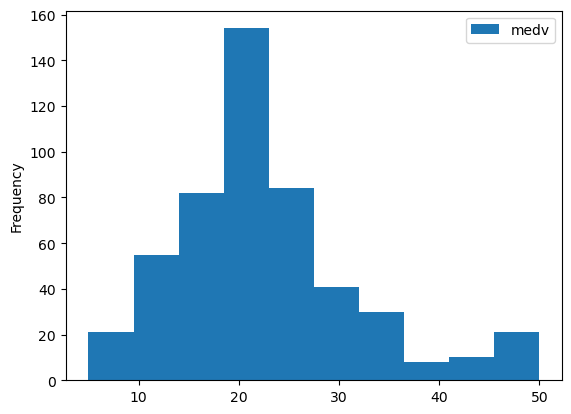

In [210]:
#Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato?
#bst.groupby("crim")["medv"].mean().round(2)
bst.loc[:,["crim","medv"]].plot.hist(x="crim", y="medv")

In [206]:
#Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato?
bst.groupby(["ptratio","medv"])["rm"].mean()

ptratio  medv
12.6     30.3    7.107
         33.3    7.287
         34.6    7.274
13.0     22.8    5.560
         30.1    6.842
                 ...  
21.2     19.2    6.458
         19.6    6.326
         23.0    6.372
22.0     18.2    5.663
         20.6    5.936
Name: rm, Length: 440, dtype: float64

<Axes: ylabel='Frequency'>

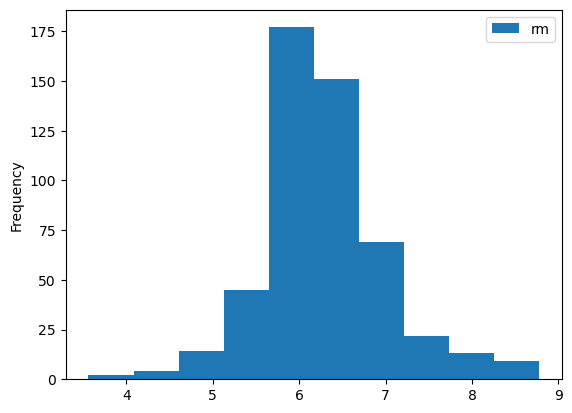

In [204]:
bst.loc[:,["ptratio","rm"]].plot.hist(x="ptratio", y="rm")

In [208]:
#Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni? E del numero di stanze? E delle tasse?
media_eta_abitazioni = bst.groupby(["rad","rm","tax"])["age"].mean()
media_eta_abitazioni.round().astype(int)

rad  rm     tax
1    5.706  304    28
     5.876  315    19
     6.030  273    81
     6.031  304    23
     6.108  315    32
                   ..
24   7.016  666    98
     7.061  666    77
     7.313  666    98
     7.393  666    99
     8.780  666    83
Name: age, Length: 495, dtype: int32

<Axes: ylabel='Frequency'>

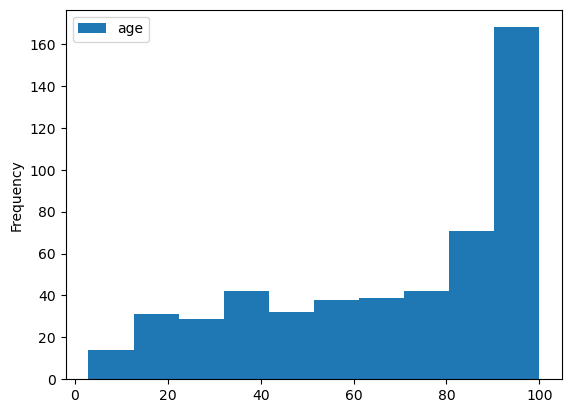

In [212]:
bst.loc[:,["rad","age"]].plot.hist(x="rad", y="age")

In [10]:
#Abbiamo due DataFrame
employees_df = pd.DataFrame({ 
    'employee_id': [101, 102, 103, 104, 105], 
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 
    'department_id': [1, 2, 1, 2, 3] 
})

departments_df = pd.DataFrame({ 
    'department_id': [1, 2, 3], 
    'department_name': ['HR', 'IT', 'Finance'], 
    'location': ['New York', 'San Francisco', 'Chicago'] 
})

In [14]:
#Unire questi DataFrame in base alla colonna comune department_id, in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge()
merge_df = employees_df.merge(departments_df, on="department_id")

In [16]:
#Per ogni DataFrame, trasformare la colonna department_id nell'indice, facendo in modo che la modifica sia permanente; poi unire i due dataset mediante il metodo .join()
employees_df.set_index("department_id", inplace=True)
departments_df.set_index("department_id", inplace=True)
joined_df = employees_df.join(departments_df)

In [20]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
dotenv.load_dotenv(override=True)
username=os.getenv("username")
password=os.getenv("password")
host=os.getenv("host")
dbname=os.getenv("dbname")
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
show_tables = pd.read_sql("Show Tables", db_engine)
df_employee = pd.read_sql("SELECT * FROM dimemployee", db_engine)
df_employee_sales_territory = pd.read_sql("SELECT * FROM dimemployeesalesterritory", db_engine)
df_sales_territory = pd.read_sql("SELECT * FROM dimsalesterritory", db_engine)
db_engine.dispose()
show_tables

Tables_in_AdventureWorksDW
0   adventureworksdwbuildversion
1                     dimaccount
2                    dimcurrency
3                    dimcustomer
4                        dimdate
5             dimdepartmentgroup
6                    dimemployee
7      dimemployeesalesterritory
8                   dimgeography
9                dimorganization
10                    dimproduct
11            dimproductcategory
12         dimproductsubcategory
13                  dimpromotion
14                   dimreseller
15                dimsalesreason
16             dimsalesterritory
17                   dimscenario
18              factcurrencyrate
19                   factfinance
20             factinternetsales
21       factinternetsalesreason
22          factproductinventory
23             factresellersales
24                     factsales
25                   sysdiagrams
26   vw_factresellersales_denorm

In [24]:
df_employee.set_index("EmployeeKey", inplace=True)

In [30]:
df_employee

ParentEmployeeKey  EmployeeNationalIDAlternateKey  \
EmployeeKey                                                      
1                         18.0                        14417807   
2                          7.0                       253022876   
3                         14.0                       509647174   
4                          3.0                       112457891   
5                          3.0                       112457891   
...                        ...                             ...   
292                      290.0                       134219713   
293                      272.0                        90836195   
294                      277.0                       481044938   
295                      290.0                       954276278   
296                      294.0                       758596752   

             ParentEmployeeNationalIDAlternateKey FirstName  \
EmployeeKey                                                   
1                                     446466105.0       Guy   
2                                      24756624.0     Kevin   
3                                     245797967.0   Roberto   
4                                     509647174.0       Rob   
5                                     509647174.0       Rob   
...                                           ...       ...   
292                                   982310417.0    Ranjit   
293                                   502097814.0      Tete   
294                                   112432117.0      Syed   
295                                   982310417.0    Rachel   
296                                   481044938.0      Lynn   

                      LastName MiddleName  NameStyle  \
EmployeeKey                                            
1                      Gilbert          R          0   
2                        Brown          F          0   
3                   Tamburello       None          0   
4                      Walters       None          0   
5                      Walters       None          0   
...                        ...        ...        ...   
292          Varkey Chudukatil          R          0   
293                Mensa-Annan          A          0   
294                      Abbas          E          0   
295                     Valdez          B          0   
296                   Tsoflias          N          0   

                                    Title    HireDate   BirthDate  ... Gender  \
EmployeeKey                                                        ...          
1            Production Technician - WC60  2006-01-28  1981-11-12  ...      M   
2                     Marketing Assistant  2006-08-26  1986-12-01  ...      M   
3                     Engineering Manager  2007-06-11  1974-06-12  ...      M   
4                    Senior Tool Designer  2007-07-05  1974-07-23  ...      M   
5                    Senior Tool Designer  2007-07-05  1974-07-23  ...      M   
...                                   ...         ...         ...  ...    ...   
292                  Sales Representative  2011-12-29  1975-04-30  ...      M   
293                  Sales Representative  2012-04-30  1977-08-05  ...      M   
294                 Pacific Sales Manager  2012-10-12  1974-08-11  ...      M   
295                  Sales Representative  2012-12-28  1975-02-06  ...      F   
296                  Sales Representative  2012-12-28  1970-10-16  ...      F   

            PayFrequency BaseRate VacationHours SickLeaveHours CurrentFlag  \
EmployeeKey                                                                  
1                      1  12.4500            21             30           1   
2                      2  13.4615            42             41           1   
3                      2  43.2692             2             21           1   
4                      2  29.8462            48             80           1   
5                      2  29.8462            48             80           1   
...  

In [32]:
df_employee_sales_territory

EmployeeKey  SalesTerritoryKey
0           272                  1
1           277                  1
2           286                  1
3           289                  1
4           293                  1
5           272                  2
6           277                  2
7           281                  2
8           272                  3
9           277                  3
10          281                  3
11          282                  3
12          283                  3
13          272                  4
14          277                  4
15          282                  4
16          286                  4
17          287                  4
18          272                  5
19          277                  5
20          281                  5
21          285                  5
22          272                  6
23          277                  6
24          284                  6
25          288                  6
26          277                  7
27          290                  7
28          291                  7
29          292                  7
30          277                  8
31          290                  8
32          295                  8
33          277                  9
34          294                  9
35          296                  9
36          277                 10
37          290                 10
38          291                 10

In [34]:
df_employee_sales_territory.set_index("EmployeeKey", inplace=True)

In [72]:
df_employee_sales_territory

SalesTerritoryKey
EmployeeKey                   
272                          1
277                          1
286                          1
289                          1
293                          1
272                          2
277                          2
281                          2
272                          3
277                          3
281                          3
282                          3
283                          3
272                          4
277                          4
282                          4
286                          4
287                          4
272                          5
277                          5
281                          5
285                          5
272                          6
277                          6
284                          6
288                          6
277                          7
290                          7
291                          7
292                          7
277                          8
290                          8
295                          8
277                          9
294                          9
296                          9
277                         10
290                         10
291                         10

In [88]:
df_merged = pd.merge(df_employee, df_employee_sales_territory, on="EmployeeKey")

In [90]:
df_merged

ParentEmployeeKey  EmployeeNationalIDAlternateKey  \
EmployeeKey                                                      
272                      277.0                       502097814   
272                      277.0                       502097814   
272                      277.0                       502097814   
272                      277.0                       502097814   
272                      277.0                       502097814   
272                      277.0                       502097814   
277                      277.0                       112432117   
277                      277.0                       112432117   
277                      277.0                       112432117   
277                      277.0                       112432117   
277                      277.0                       112432117   
277                      277.0                       112432117   
277                      277.0                       112432117   
277                      277.0                       112432117   
277                      277.0                       112432117   
277                      277.0                       112432117   
281                      272.0                       841560125   
281                      272.0                       841560125   
281                      272.0                       841560125   
282                      272.0                       191644724   
282                      272.0                       191644724   
283                      272.0                       615389812   
284                      272.0                       234474252   
285                      272.0                       716374314   
286                      272.0                        61161660   
286                      272.0                        61161660   
287                      272.0                       139397894   
288                      272.0                       399771412   
289                      272.0                       987554265   
290                      277.0                       982310417   
290                      277.0                       982310417   
290                      277.0                       982310417   
291                      290.0                       668991357   
291                      290.0                       668991357   
292                      290.0                       134219713   
293                      272.0                        90836195   
294                      277.0                       481044938   
295                      290.0                       954276278   
296                      294.0                       758596752   

             ParentEmployeeNationalIDAlternateKey FirstName  \
EmployeeKey                                                   
272                                   112432117.0   Stephen   
272                                   112432117.0   Stephen   
272                                   112432117.0   Stephen   
272                                   112432117.0   Stephen   
272                                   112432117.0   Stephen   
272                                   112432117.0   Stephen   
277                                   112432117.0     Brian   
277                                   112432117.0     Brian   
277                                   112432117.0     Brian   
277                                   112432117.0     Brian   
277                                   112432117.0     Brian   
277                                   112432117.0     Brian   
277                                   112432117.0     Brian   
277                                   112432117.0     Brian   
277                                   112432117.0     Brian   
277                                   112432117.0     Brian   
281                                   502097814.0   Michael   
281                                   502097814.0   Michael   
281                                   50209781

In [82]:
df_sales_territory

SalesTerritoryAlternateKey SalesTerritoryRegion  \
SalesTerritoryKey                                                    
1                                           1            Northwest   
2                                           2            Northeast   
3                                           3              Central   
4                                           4            Southwest   
5                                           5            Southeast   
6                                           6               Canada   
7                                           7               France   
8                                           8              Germany   
9                                           9            Australia   
10                                         10       United Kingdom   
11                                          0         Corporate HQ   

                  SalesTerritoryCountry SalesTerritoryGroup  \
SalesTerritoryKey                                             
1                         United States       North America   
2                         United States       North America   
3                         United States       North America   
4                         United States       North America   
5                         United States       North America   
6                                Canada       North America   
7                                France              Europe   
8                               Germany              Europe   
9                             Australia             Pacific   
10                       United Kingdom              Europe   
11                         Corporate HQ        Corporate HQ   

                                                 SalesTerritoryImage  
SalesTerritoryKey                                                     
1                  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
2                  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
3                  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
4                  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
5                  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
6                  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
7                  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
8                  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
9                  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
10                 b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
11                                                              None

In [92]:
df_merged.set_index("SalesTerritoryKey", inplace=True)
df_complete = pd.merge(df_merged, df_sales_territory, on="SalesTerritoryKey")
df_complete

ParentEmployeeKey  EmployeeNationalIDAlternateKey  \
SalesTerritoryKey                                                      
1                              277.0                       502097814   
1                              277.0                       112432117   
1                              272.0                        61161660   
1                              272.0                       987554265   
1                              272.0                        90836195   
2                              277.0                       502097814   
2                              277.0                       112432117   
2                              272.0                       841560125   
3                              277.0                       502097814   
3                              277.0                       112432117   
3                              272.0                       841560125   
3                              272.0                       191644724   
3                              272.0                       615389812   
4                              277.0                       502097814   
4                              277.0                       112432117   
4                              272.0                       191644724   
4                              272.0                        61161660   
4                              272.0                       139397894   
5                              277.0                       502097814   
5                              277.0                       112432117   
5                              272.0                       841560125   
5                              272.0                       716374314   
6                              277.0                       502097814   
6                              277.0                       112432117   
6                              272.0                       234474252   
6                              272.0                       399771412   
7                              277.0                       112432117   
7                              277.0                       982310417   
7                              290.0                       668991357   
7                              290.0                       134219713   
8                              277.0                       112432117   
8                              277.0                       982310417   
8                              290.0                       954276278   
9                              277.0                       112432117   
9                              277.0                       481044938   
9                              294.0                       758596752   
10                             277.0                       112432117   
10                             277.0                       982310417   
10                             290.0                       668991357   

                   ParentEmployeeNationalIDAlternateKey FirstName  \
SalesTerritoryKey                                                   
1                                           112432117.0   Stephen   
1                                           112432117.0     Brian   
1                                           502097814.0    Pamela   
1                                           502097814.0     David   
1                                           502097814.0      Tete   
2                                           112432117.0   Stephen   
2                                           112432117.0     Brian   
2                                           502097814.0   Michael   
3                                           112432117.0   Stephen   
3                                           112432117.0     Brian   
3                                           502097814.0   Michael   
3                                           502097814.0     Linda   
3                                           502097814.0   Jillian   
4                              